In [11]:
# Libs
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
from xgboost import XGBRegressor
import joblib
import matplotlib.pyplot as plt
import os

In [12]:
# Images folder
output_dir = '../images'

In [1]:
# Load the data
X_train_scaled = np.load('../notebooks/X_train_scaled.npy')
y_train = np.load('../notebooks/y_train.npy')
X_test_scaled = np.load('../notebooks/X_test_scaled.npy')
y_test = np.load('../notebooks/y_test.npy')

# Create the XGBoost Regressor model
xgb_reg = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)

# Train the model
xgb_reg.fit(X_train_scaled, y_train)

# Make predictions
y_pred_train = xgb_reg.predict(X_train_scaled)
y_pred_test = xgb_reg.predict(X_test_scaled)

# Evaluate the model
print("XGBoost")
print("Training MSE:", mean_squared_error(y_train, y_pred_train))
print("Training R^2:", r2_score(y_train, y_pred_train))
print("Test MSE:", mean_squared_error(y_test, y_pred_test))
print("Test R^2:", r2_score(y_test, y_pred_test))

# Save the model
joblib.dump(xgb_reg, 'xgboost_model.pkl')


XGBoost
Training MSE: 36118128.31990611
Training R^2: 0.9939253762693911
Test MSE: 908904911.6691651
Test R^2: 0.8866355499833903


['xgboost_model.pkl']

In [2]:
xgb_reg = XGBRegressor()
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}

grid_search = GridSearchCV(estimator=xgb_reg, param_grid=param_grid, scoring='neg_mean_squared_error', cv=3)
grid_search.fit(X_train_scaled, y_train)
best_params = grid_search.best_params_
print("Best Parameters:", best_params)


Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}


In [4]:
# Load the data
X_train_scaled = np.load('../notebooks/X_train_scaled.npy')
y_train = np.load('../notebooks/y_train.npy')
X_test_scaled = np.load('../notebooks/X_test_scaled.npy')
y_test = np.load('../notebooks/y_test.npy')

# Create the XGBoost model with the best parameters
xgb_reg = XGBRegressor(
    learning_rate=0.1,
    max_depth=3,
    n_estimators=200
)

# Train the model
xgb_reg.fit(X_train_scaled, y_train)

# Make predictions
y_pred_train = xgb_reg.predict(X_train_scaled)
y_pred_test = xgb_reg.predict(X_test_scaled)

# Evaluate the model
print("XGBoost with Best Parameters")
print("Training MSE:", mean_squared_error(y_train, y_pred_train))
print("Training R^2:", r2_score(y_train, y_pred_train))
print("Test MSE:", mean_squared_error(y_test, y_pred_test))
print("Test R^2:", r2_score(y_test, y_pred_test))

# Save the model
joblib.dump(xgb_reg, 'xgboost_final_model.pkl')


XGBoost with Best Parameters
Training MSE: 373442606.6232211
Training R^2: 0.9371915593155591
Test MSE: 808915168.324281
Test R^2: 0.899106912076459


['xgboost_final_model.pkl']

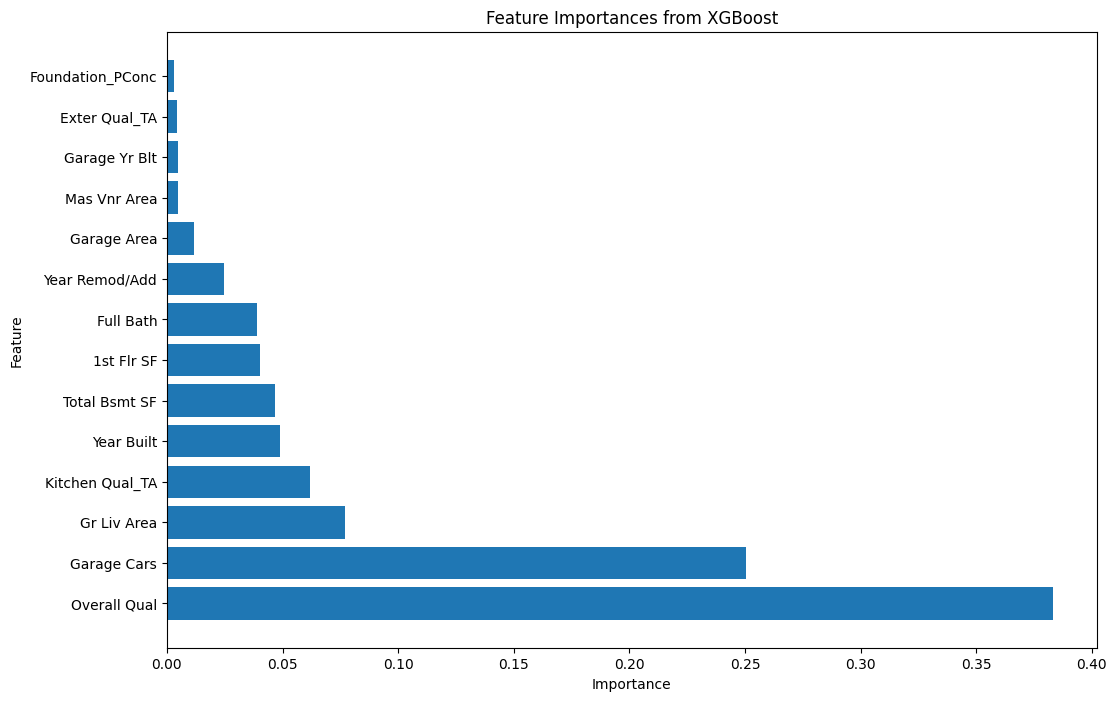

In [13]:
# Get feature importances
feature_importances = xgb_reg.feature_importances_

# Create a DataFrame for better visualization
feature_names = np.load('../notebooks/feature_names.npy', allow_pickle=True)  # Ensure you have the feature names
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances from XGBoost')
plt.savefig(os.path.join(output_dir, 'Feature_Importances_from_XGBoost.png'))
plt.show()

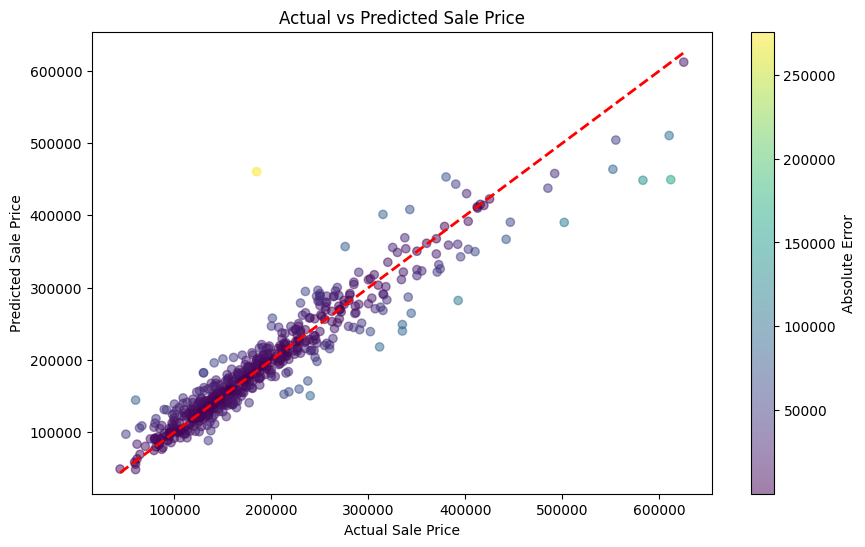

In [16]:
# Assuming y_test and y_pred_test are defined
plt.figure(figsize=(10, 6))

# Scatter plot with color representing absolute error
plt.scatter(y_test, y_pred_test, c=np.abs(y_test - y_pred_test), cmap='viridis', alpha=0.5)
plt.colorbar(label='Absolute Error')

# Add reference line
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)

plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.title('Actual vs Predicted Sale Price')
plt.savefig(os.path.join(output_dir, 'Actual_vs_Predicted_Sale_Price'))
plt.show()
